In [3]:
import pandas as pd 

base = pd.read_csv('plano_saude2.csv')

X = base.iloc[:, 0:1].values
y = base.iloc[:, 1].values

## Regressão Linear Simples

In [6]:
from sklearn.linear_model import LinearRegression
regressorLinear = LinearRegression()
regressorLinear.fit(X, y)

scoreLinear = regressorLinear.score(X, y)
scoreLinear

0.6722701203412687

In [8]:
### Prevendo o valor do plano para alguém com 40 anos de idade
regressorLinear.predict([[40]])

array([2463.18787879])

Text(0, 0.5, 'Custo')

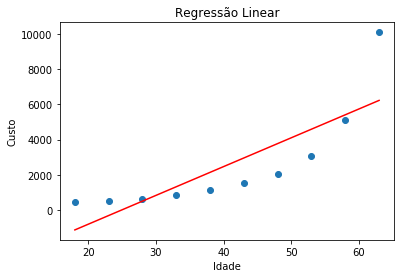

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, regressorLinear.predict(X), color = 'red')
plt.title('Regressão Linear')
plt.xlabel('Idade')
plt.ylabel('Custo')

## Regresssão Polinomial

In [17]:
from sklearn.preprocessing import PolynomialFeatures
### Instanciando PolynomialFeatures afirmando que o expoente máximo será 2
#:: DICA: Ao aumentar o degree podemos melhorar a curva sobre os nossos dados ::#
poly = PolynomialFeatures(degree=2)
### Colunas de X_poly => Repetições | Valor | demais colunas: Valor elevado a degree=2 => soma com 1 e refaz o passo anterior => até que degree==degree setado
X_poly = poly.fit_transform(X)

In [18]:
regressorPolinomial = LinearRegression()
regressorPolinomial.fit(X_poly, y)

scorePolinomial = regressorPolinomial.score(X_poly, y)
scorePolinomial

0.9180331903463941

In [22]:
### Prevendo o valor do plano de saúde para uma pessoa de 40 anos de idade usando regressão polinomial
regressorPolinomial.predict(poly.transform([[40]]))

array([852.01818182])

Text(0, 0.5, 'Custo')

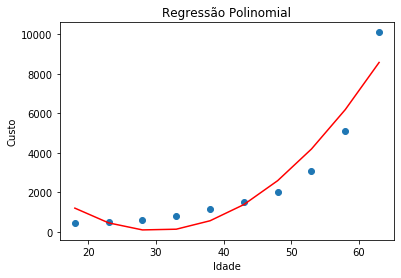

In [24]:
plt.scatter(X, y)
plt.plot(X, regressorPolinomial.predict(poly.fit_transform(X)), color = 'red')
plt.title('Regressão Polinomial')
plt.xlabel('Idade')
plt.ylabel('Custo')

Novo Score com degree=5:  0.9997860563090523


Text(0, 0.5, 'Custo')

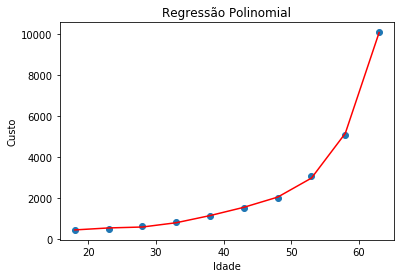

In [28]:
### Perceba que ao aumentar o degree, aumentamos o score do nosso modelo
# NÃO AUMENTAR DEMAIS O DEGREE PARA NÃO DAR O ERRO DE ==OVERFITING== que é quando um modelo se adapta demais a um dataset e termina DECORANDO os resultados e não APRENDENDO
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)
regressorPolinomial = LinearRegression()
regressorPolinomial.fit(X_poly, y)
scorePolinomial = regressorPolinomial.score(X_poly, y)
print('Novo Score com degree=5: ', scorePolinomial)

plt.scatter(X, y)
plt.plot(X, regressorPolinomial.predict(poly.fit_transform(X)), color = 'red')
plt.title('Regressão Polinomial')
plt.xlabel('Idade')
plt.ylabel('Custo')